# Харитонов Олександр КА-12
## Лабораторна робота №4
### Варіант 10

## Алгоритм Mean Shift. Вiдобразити графiчно центри кластерiв.

## Метрики якостi: Estimated number of clusters, Adjusted Rand Index, Adjusted Mutual Information, Silhouette Coefficient.

Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

Початковi данi:

(а) 

    sklearn.datasets.samples_generator.make_circles

    X, y = make_ circles (10000 , factor =.1 , noise =.1)

(б) 

    from sklearn.datasets import make_blobs

    from sklearn.preprocessing import StandardScaler

    centers = [ [ 1 , 1 ] , [ −1 , −1] , [ 1 , −1]]

    X1, labels_true = make_blobs ( n_samples =10000 , centers = centers , cluster_std =0.4 , random_state=0)

    X = StandardScaler( ).fit_transform (X1)

## Опис методу кластеризацiї, який використовувався
MeanShift – метод середнього зсуву, відноситься до методів кластеризації на основі оцінки щільності.

Метод середнього зсуву направлений на виявлення «плям» в просторі точок даних. Це алгоритм на основі центроїдів, який працює, оновлюючи кандидати в центроїди, щоб вони були середніми точками, центрами мас в заданій області.

Потім ці кандидати фільтруються на етапі постобробки, щоб виключити майже дублікати і сформувати остаточний набір центроїдів.

Кластери відповідають локальним максимумам функції оцінки щільності, модам, до яких збігається метод.

Зазвичай використовується гаусівське ядро, коефіцієнт щільності. Метод ітераційний, тому починаючи з точки $x_0$ , переміщується в точку зсуву допоки не буде досягнуто збіжності до локального максимуму щільності

## Опис метрик якостi кластеризацiї, за якими порiвнювалися моделi.

1) Коефіцієнт силуету (Silhouette Coefficient) визначають для деякого об’єкту даних:

    a – середня відстань від даного об'єкта до всіх інших об'єктів того ж кластера;

    b – середня відстань від даного об'єкта до всіх об'єктів найближчого іншого кластера.

    $ s = (b - a) / max(a, b) $

    Коефіцієнт силуету - це міра того, наскільки добре об’єкти даних згруповані з об’єктами, які на них схожі. Моделі кластеризації з високим коефіцієнтом силуету називають щільними (об’єкти в одному кластері схожі один на одного) і добре розділеними (об’єкти в різних кластерах не дуже схожі один на одного).

2) Adjusted Rand Index 

    Індекс RI не гарантує отримання значення, близького до 0,0 при випадковій розмітці. Скоригований індекс RI коригує випадковість і визначає базовий рівень.
    
    ARI використовує модель перестановок для кластеризації: кількість та розмір кластерів фіксовані, далі генеруються всі випадкові маркування шляхом перестановок елементів між фіксованими кластерами. 
    
    Розраховується очікуване значення E(RI) індекса RI випадкового маркування, і визначається скоригований індекс Ренда наступним чином:

$$ ARI = (RI − E(RI)) /  (max(RI) − E(RI)) $$

Діапазон оцінок для RI становить [0, 1]. Діапазон оцінок для ARI становить [-1, 1].

Індекс Ренда також можна розглядати через призму точності бінарної класифікації пар
об’єктів з O. Розглянемо два наступних класи:
- $o_i$ та $o_j$ знаходяться в одному кластері в $X$ та $Y$.
- $o_i$ та $o_j$ знаходяться в різних кластерах в $X$ та $Y$.
Тоді

a – кількість пар, правильно помічених як такі, що належать до одного кластера (справжні
позитивні значення, true positives), і

b – кількість пар, правильно помічених як такі, що належать до різних кластерів (істинно
негативні значення, true negatives).

Тоді індекс Ренда – це оцінка відсотка правильних рішень, прийнятих алгоритмом,
розраховується за формулою:

$$ RI = (TP + TN) / (TP + TN + FP + FN) $$

де TP – кількість істинно позитивних прикладів, TN – кількість істинно негативних прикладів,
FP – кількість хибно позитивних прикладів, FN – кількість хибно негативних прикладів.

Індекс RI приймає значення від 0 до 1, де 0 вказує, що дві кластеризації даних не узгоджуються по жодній парі об’єктів, а 1 вказує, що дві кластеризації абсолютно однакові.

3) Adjusted Mutual Information

Скоригована взаємна інформація між двома кластерами.

Скоригована взаємна інформація (AMI) - це коригування оцінки взаємної інформації (MI) для обліку випадковості. Це пояснює той факт, що MI, як правило, вище для двох кластеризацій з більшою кількістю кластерів, незалежно від того, чи є насправді більше інформації. Для двох кластерів $U$ і $V$, AMI дається як:
$$ AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))] $$

Ця метрика не залежить від абсолютних значень міток: перестановка значень міток класу або кластера жодним чином не змінить значення оцінки.

Ця метрика більш симетрична: перемикання $U(label_true)$ з $V(labels_pred)$ повертає однакове значення оцінки. Це може бути корисно для вимірювання узгодження двох незалежних стратегій присвоєння міток на одному наборі даних, коли реальна істина не відома.

Майте на увазі, що ця функція на порядок повільніша, ніж інші показники, такі як скоригований індекс Ренда(ARI).

Взаємна інформація (MI) між двома кількостями є мірою того, в якій мірі знання однієї кількості зменшує невизначеність у відношенні другого. 

Простим поясненням цього поняття є така формула:

MI (feature; target) = Ентропія (feature) - Ентропія (feature|target)

МІ буде в діапазоні від 0 до ∞.

Високе значення Mi означає більш тісний зв'язок між функцією та ціллю, що вказує на важливість функції для тренування моделі. Однак, чим нижче оцінка MI до 0, то це вказує на слабкий зв'язок між функцією та ціллю.

<center> <img src=https://i.imgur.com/Q2sN2Lc_d.webp?maxwidth=760&fidelity=grand> </center>

4) Estimated number of clusters

Визначення кількості кластерів в наборі даних, величина, яку часто позначають k як в алгоритмі k-середніх, є частою проблемою кластеризації даних і є відмінною проблемою від процесу фактичного вирішення проблеми кластеризації. 

Для певного класу алгоритмів кластеризації (зокрема k-середніх, k-медоїдів та алгоритму максимізації очікувань) існує параметр, який зазвичай називають k, який визначає кількість кластерів для виявлення. Інші алгоритми, такі як алгоритм DBSCAN і OPTICS, не вимагають специфікації цього параметра; ієрархічна кластеризація уникає проблеми взагалі.. 

Правильний вибір k часто неоднозначний, з інтерпретаціями залежно від форми і масштабу розподілу точок в наборі даних і бажаної роздільної здатності кластеризації користувача. Крім того, збільшення k без штрафу завжди зменшить кількість помилок у результуючій кластеризації до крайнього випадку нульової помилки, якщо кожна точка даних вважається власним кластером (тобто, коли k дорівнює кількості точок даних, n). 

Інтуїтивно тоді, оптимальний вибір k матиме баланс між максимальним стисненням даних за допомогою одного кластера та максимальною точністю, призначаючи кожну точку даних своєму кластеру. Якщо відповідне значення k не є очевидним з попереднього знання властивостей набору даних, його потрібно вибрати якимось чином. Існує кілька категорій методів прийняття цього рішення.

In [41]:
from sklearn.datasets import make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import time



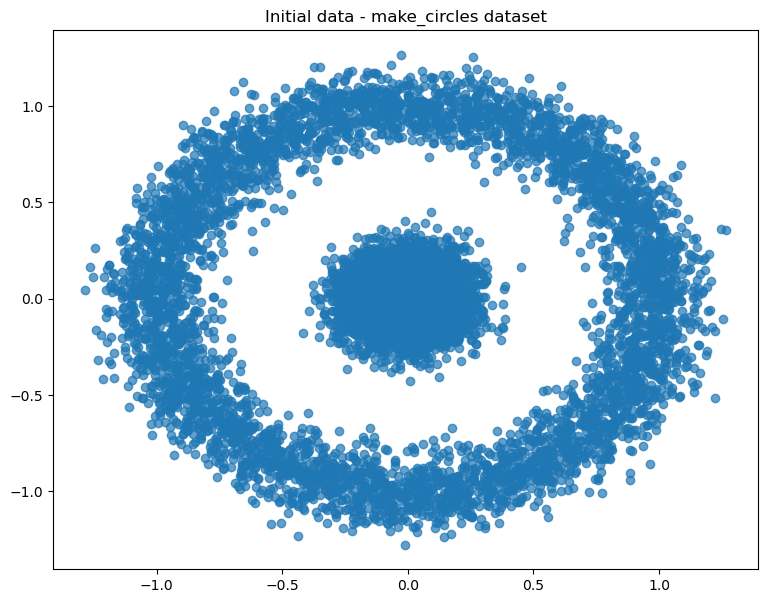

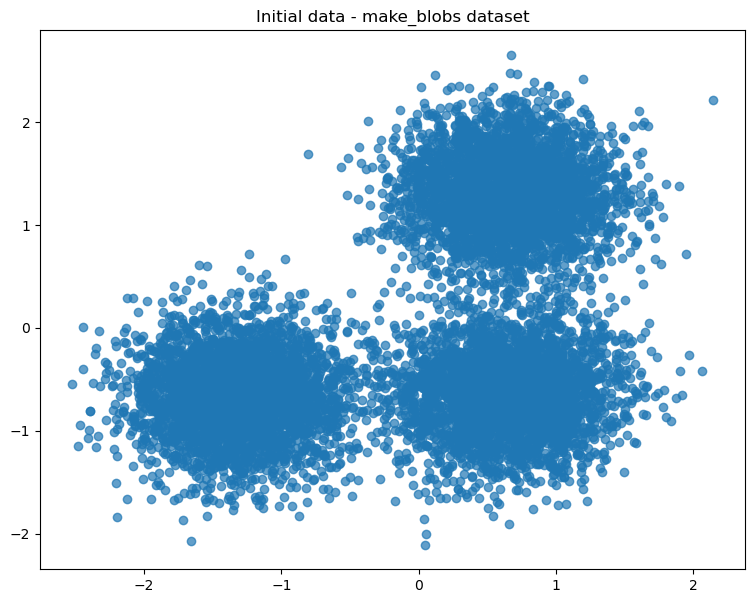

In [42]:
X_circles, y = make_circles(n_samples=10000, factor=0.1, noise=0.1)
X_blobs, labels_true = make_blobs(n_samples=10000, centers=[[1, 1], [-1, -1], [1, -1]], cluster_std=0.4, random_state=0)
X_blobs = StandardScaler().fit_transform(X_blobs)

datasets = [(X_circles, 'make_circles dataset'), (X_blobs, 'make_blobs dataset')]

for data, data_name in datasets:
    plt.figure(figsize=(20, 7))

    # Початкові дані
    plt.subplot(1, 2, 2)
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
    plt.title(f'Initial data - {data_name}')

    
plt.show()

Dataset: make_blobs dataset
Estimated number of clusters: 3
Adjusted Rand Index: 0.9749726560521835
Adjusted Mutual Information: 0.9542191161545441
Silhouette Coefficient: 0.635090106134551
Clustering time: 0.11397624015808105 seconds



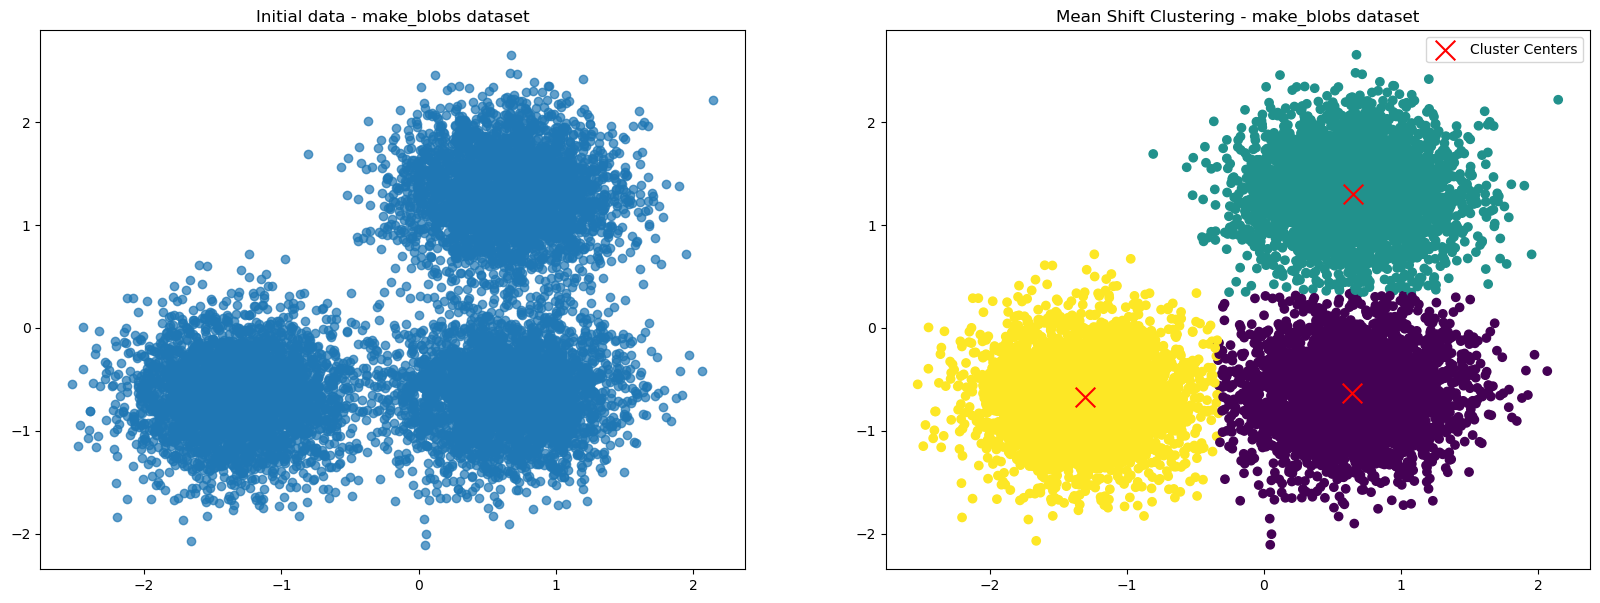

In [43]:
plt.figure(figsize=(20, 7))

# Початкові дані
plt.subplot(1, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], alpha=0.7)
plt.title(f'Initial data - make_blobs dataset')

# Кластеризація
bandwidth = estimate_bandwidth(X_blobs, quantile=0.3)


start_time = time.time()
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_blobs)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
end_time = time.time()
clustering_time = end_time - start_time

# Розбиття на кластери графічно
plt.subplot(1, 2, 2)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
plt.legend()
plt.title(f'Mean Shift Clustering - make_blobs dataset')

# Обчислення метрик якості
num_clusters = len(np.unique(labels))
ari = adjusted_rand_score(labels_true, labels) 
ami = adjusted_mutual_info_score(labels_true, labels) 
silhouette = silhouette_score(data, labels) 

print(f'Dataset: make_blobs dataset')
print(f'Estimated number of clusters: {num_clusters}')
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')
print(f'Silhouette Coefficient: {silhouette}')
print(f'Clustering time: {clustering_time} seconds\n')

## Для датасету, де ми бачисо 3 чітких скупчення об'єктів, алгортим працює швидко, та вірно визначає к-сть кластерів

Estimated number of clusters: 8
Adjusted Rand Index: 0.573216346757622
Adjusted Mutual Information: 0.5885724214797903
Silhouette Coefficient: 0.5951329698136161
Clustering time: 0.34102439880371094 seconds



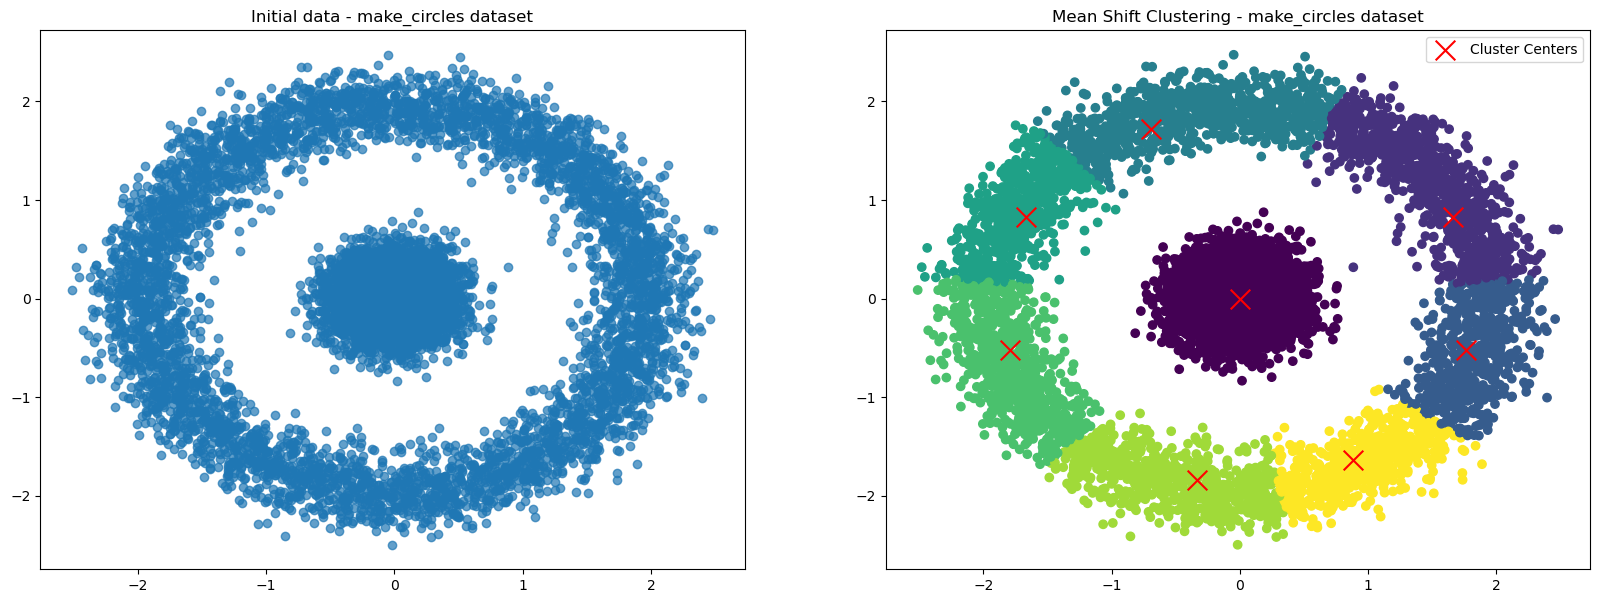

In [44]:
# Generate the dataset
plt.figure(figsize=(20, 7))
# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_circles = scaler.fit_transform(X_circles)

plt.subplot(1, 2, 1)
plt.scatter(X_circles[:, 0], X_circles[:, 1], alpha=0.7)
plt.title(f'Initial data - make_circles dataset')
# Estimate the bandwidth parameter
bandwidth = estimate_bandwidth(X_circles, quantile=0.2)

# Perform Mean Shift clustering
start_time = time.time()
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_blobs)
labels = ms.fit_predict(X_circles)
cluster_centers = ms.cluster_centers_
end_time = time.time()
clustering_time = end_time - start_time

# Розбиття на кластери графічно
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
plt.legend()
plt.title(f'Mean Shift Clustering - make_circles dataset')

# Calculate ARI, AMI, and Silhouette score
num_clusters = len(np.unique(labels))
ari = adjusted_rand_score(y, labels)
ami = adjusted_mutual_info_score(y, labels)
silhouette = silhouette_score(X_circles, labels)

print(f'Estimated number of clusters: {num_clusters}')
print(f'Adjusted Rand Index: {ari}')
print(f'Adjusted Mutual Information: {ami}')
print(f'Silhouette Coefficient: {silhouette}')
print(f'Clustering time: {clustering_time} seconds\n')

## Бачимо, що для такої структури даних, алгоортм і працює жовше, і має гірші показники, ну і найголовніше те, що кластери відображає невірно. Спробуємо це пофіксити, змінюючи параметр bandwidth.

quantile = 0.1
Estimated number of clusters: 11
Clustering time: 0.48999929428100586 seconds

quantile = 0.2
Estimated number of clusters: 8
Clustering time: 0.3430054187774658 seconds

quantile = 0.3
Estimated number of clusters: 7
Clustering time: 0.333005428314209 seconds

quantile = 0.4
Estimated number of clusters: 1
Clustering time: 0.238997220993042 seconds

quantile = 0.5
Estimated number of clusters: 1
Clustering time: 0.29402589797973633 seconds



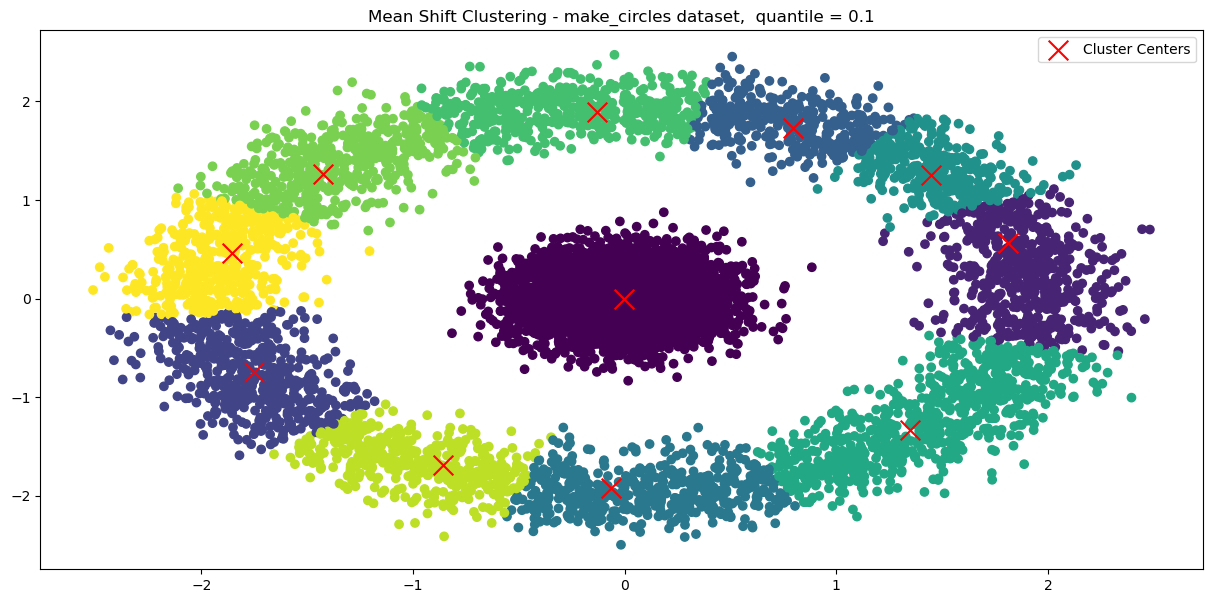

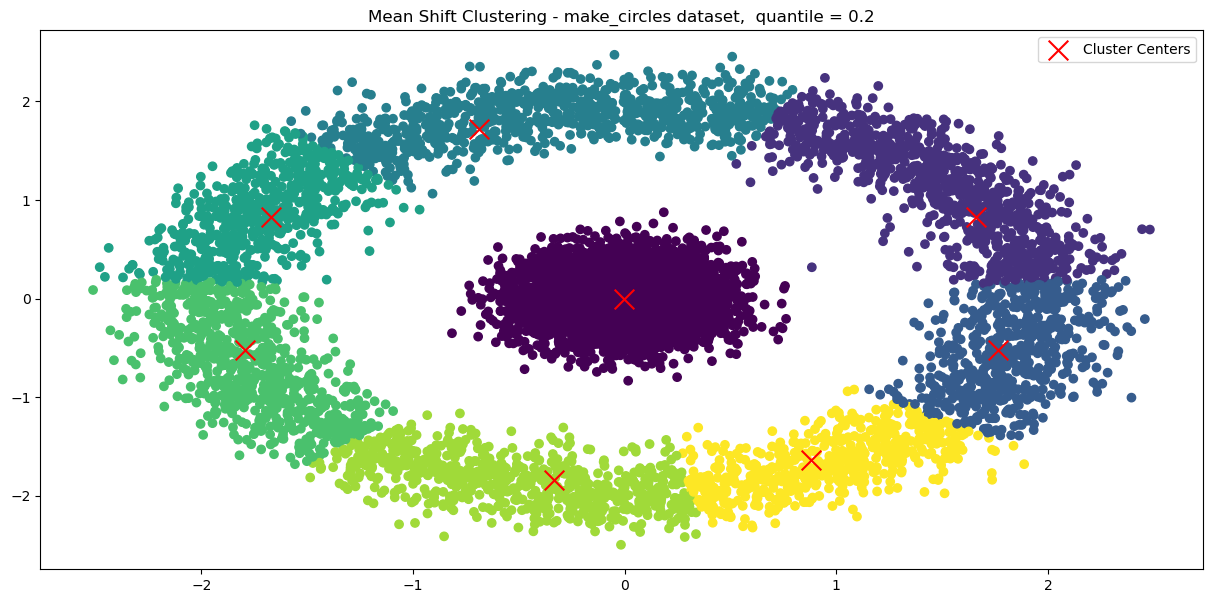

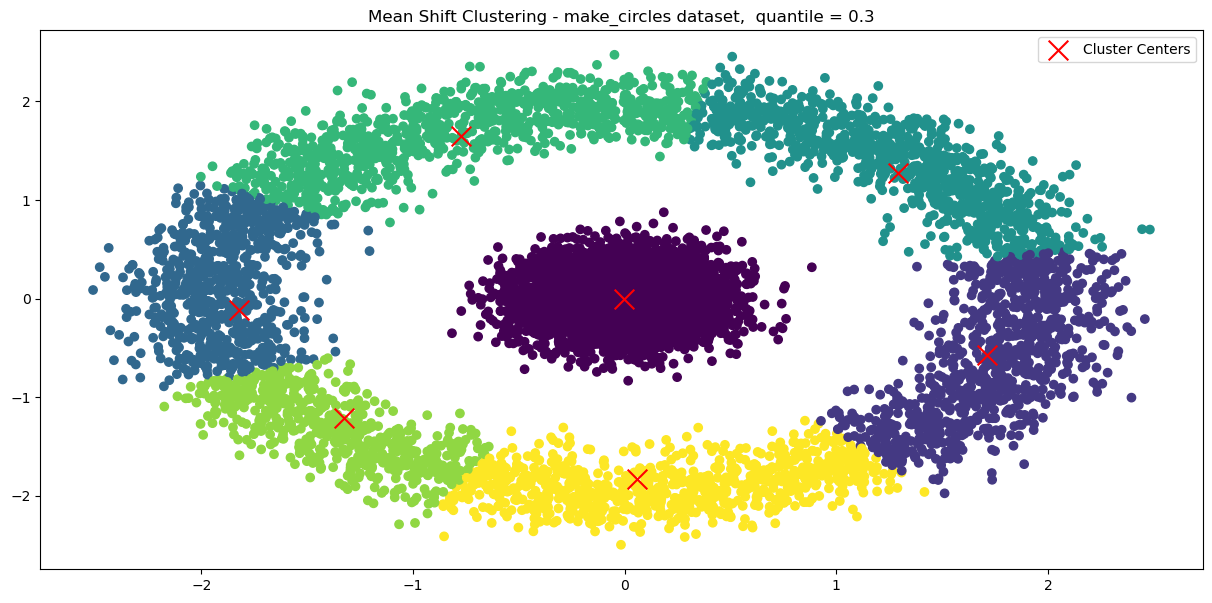

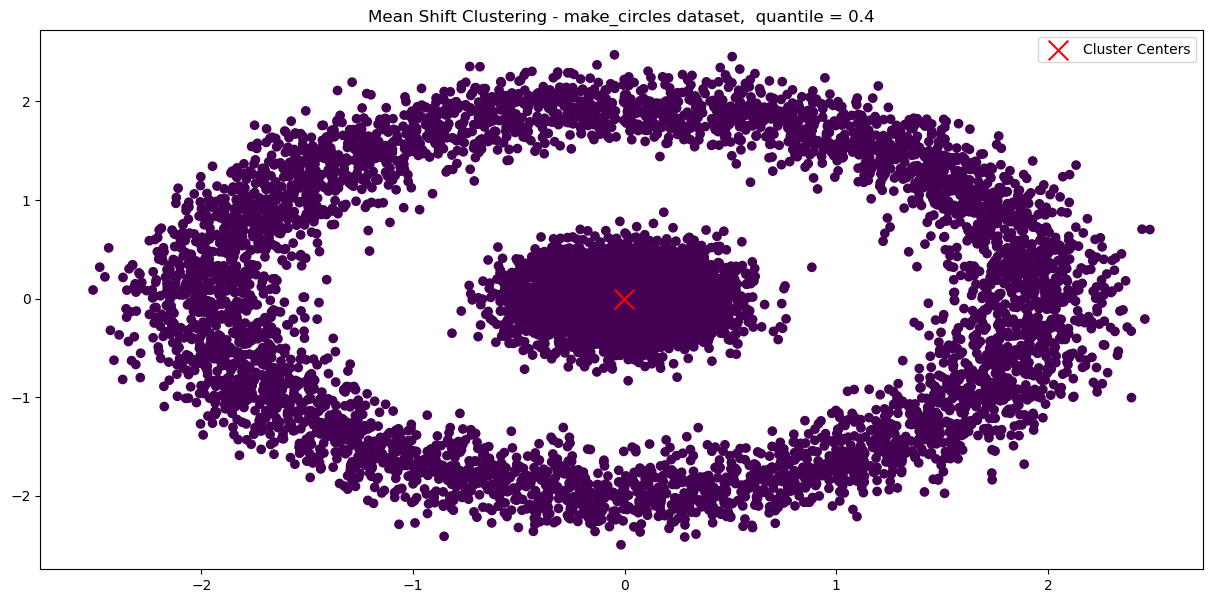

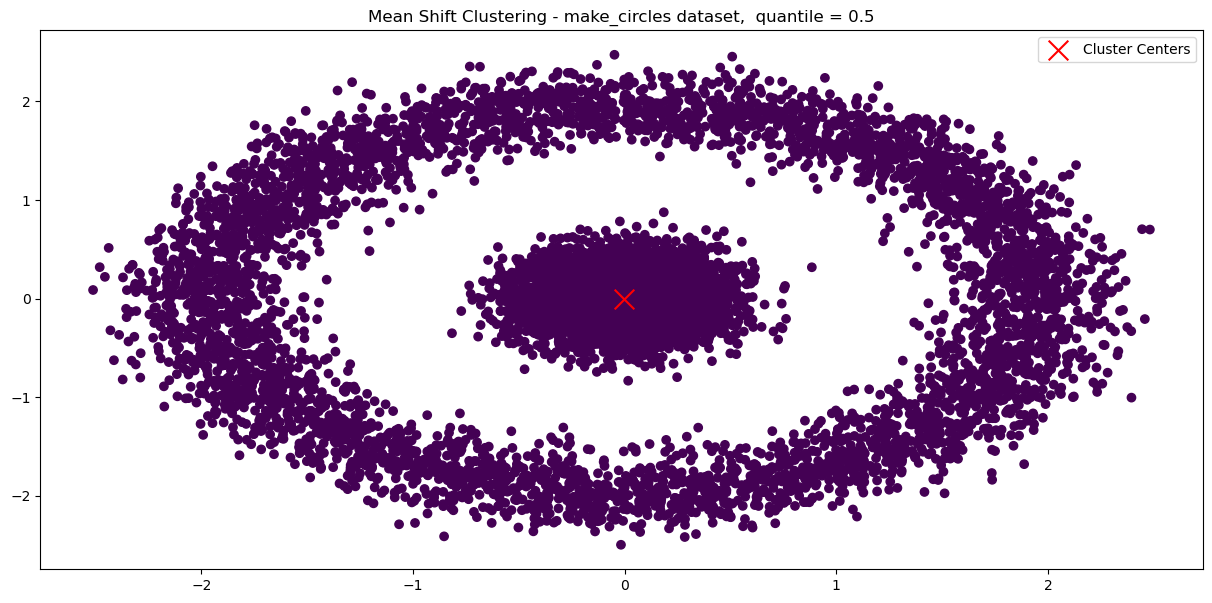

In [45]:
quantile = [0.1, 0.2, 0.3, 0.4, 0.5]
for quantile_num in quantile :
    # Estimate the bandwidth parameter
    bandwidth = estimate_bandwidth(X_circles, quantile=quantile_num)

    # Perform Mean Shift clustering
    start_time = time.time()
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_blobs)
    labels = ms.fit_predict(X_circles)
    cluster_centers = ms.cluster_centers_
    end_time = time.time()
    clustering_time = end_time - start_time

    # Розбиття на кластери графічно
    plt.figure(figsize=(15, 7))
    plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
    plt.legend()
    plt.title(f'Mean Shift Clustering - make_circles dataset,  quantile = {quantile_num}')    
    
    num_clusters = len(np.unique(labels))
    print(f'quantile = {quantile_num}')
    print(f'Estimated number of clusters: {num_clusters}')
    print(f'Clustering time: {clustering_time} seconds\n')
    
plt.show()

### Бачимо, що дані маніпуляції призвели до покращення, але не до ідеалу. В загальному алгоритму тяжко працювати з такими даними, навіть в прикладах у sklearn даний алгоритм показував не найкращі кластеризаціїї. При порівнянні з іншими алгоритмами(до речі найкраший показник bandwidth з quantile=0,3 співпав що тут, що у документаціїї) він також на цих кругах не видава повністю вірної кластеризаціїї. На даний момент часу найбільш оптимальним алгоритмом для "кругів" є DBCAN і його варіаціїї

### Перевірка стабільності розбиття після вилучення окремих об'єктів
Видалення кількох об'єктів і повторна кластеризація

Наприклад, видалення перших 100 об'єктів

In [46]:
X_removed = X_circles[100:]
y_removed = y[100:] 
# Estimate the bandwidth parameter
bandwidth = estimate_bandwidth(X_removed, quantile=0.2)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = ms.fit_predict(X_removed)

# Calculate ARI, AMI, and Silhouette score
ari = adjusted_rand_score(y_removed, labels)
ami = adjusted_mutual_info_score(y_removed, labels)
silhouette = silhouette_score(X_removed, labels)

print(f'ARI: {ari}, AMI: {ami}, Silhouette: {silhouette}')

ARI: 0.5757628896226393, AMI: 0.5909819898550515, Silhouette: 0.5946185521169735


### Бачимо, що це призвело, як і очікувалось, до невеликого, але зменшення показників 

In [47]:
X_removed = X_blobs[100:]
y_removed = labels_true[100:] 
# Estimate the bandwidth parameter
bandwidth = estimate_bandwidth(X_removed, quantile=0.2)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = ms.fit_predict(X_removed)

# Calculate ARI, AMI, and Silhouette score
ari = adjusted_rand_score(y_removed, labels)
ami = adjusted_mutual_info_score(y_removed, labels)
silhouette = silhouette_score(X_removed, labels)

print(f'ARI: {ari}, AMI: {ami}, Silhouette: {silhouette}')

ARI: 0.9744131734842143, AMI: 0.9533734045915634, Silhouette: 0.6351030381290104


### Аналогічно